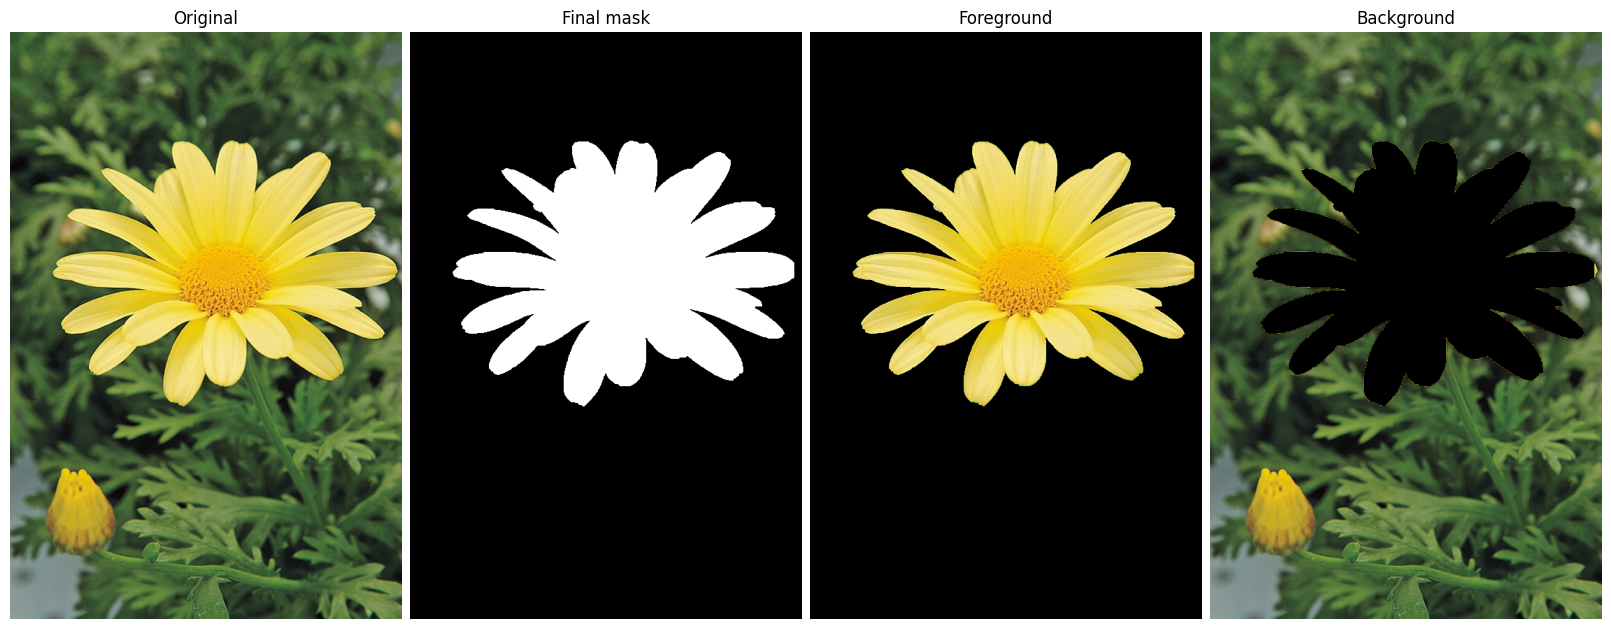

In [7]:
# Q9: GrabCut + blurred background
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- (a) GrabCut segmentation ---
daisy = cv.imread('a1images/daisy.jpg')
assert daisy is not None, "daisy.jpg not found"
h, w = daisy.shape[:2]

# init arrays
mask = np.zeros((h, w), np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50,150,500,500) # (x,y,width,height)
cv.grabCut(daisy, mask, rect, bgdModel, fgdModel, iterCount=5, mode=cv.GC_INIT_WITH_RECT)
mask_bin = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8)

foreground = cv.bitwise_and(daisy, daisy, mask=mask_bin * 255)
background = cv.bitwise_and(daisy, daisy, mask=(1 - mask_bin) * 255)

# display 
def bgr2rgb(x): return cv.cvtColor(x, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 4, figsize=(16, 8), constrained_layout=True)
ax[0].imshow(bgr2rgb(daisy));         
ax[0].set_title("Original");            
ax[0].axis('off')
ax[1].imshow(mask_bin, cmap='gray');  
ax[1].set_title("Final mask");          
ax[1].axis('off')
ax[2].imshow(bgr2rgb(foreground));    
ax[2].set_title("Foreground");          
ax[2].axis('off')
ax[3].imshow(bgr2rgb(background));    
ax[3].set_title("Background");          
ax[3].axis('off')

plt.show()


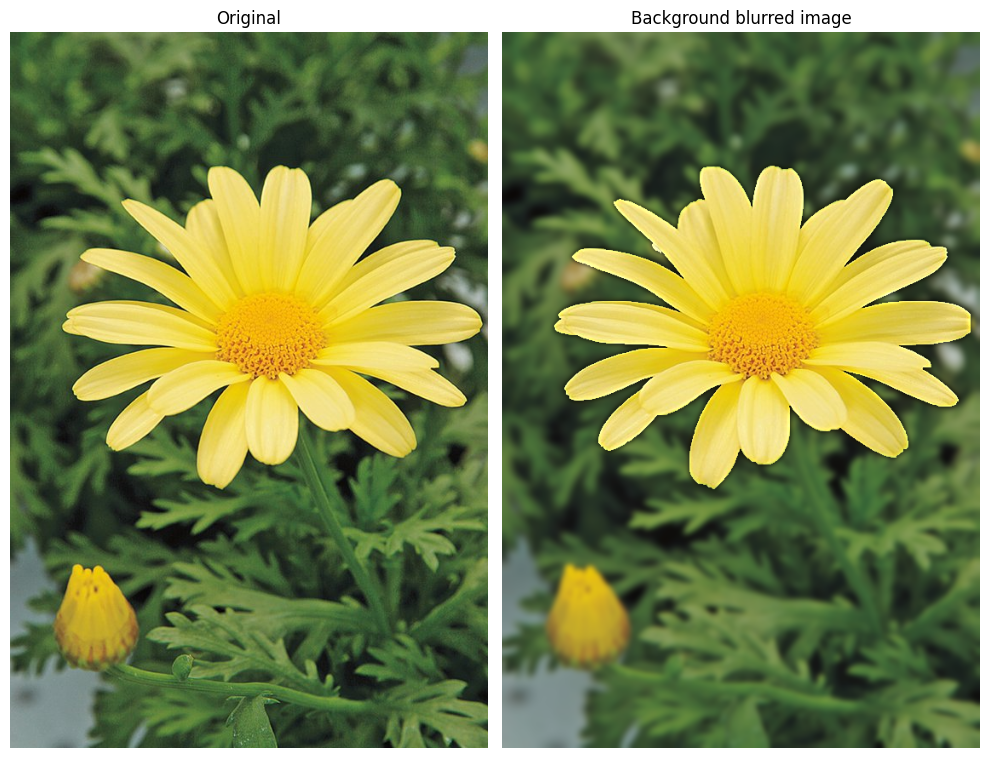

In [8]:
blurred_background = cv.GaussianBlur(background, (25, 25), 3)

# Join image
blurred = cv.add(foreground, blurred_background)

fig, axs = plt.subplots(1, 2, figsize=(10, 8))

axs[0].imshow(cv.cvtColor(daisy, cv.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
axs[1].set_title('Background blurred image')
axs[1].axis('off')

plt.tight_layout()
plt.show()
